In [1]:
# data loading and processing
import numpy as np
import pandas as pd

# model 
from sklearn.linear_model import LogisticRegression

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

# evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve

## Preprocessing

In [2]:
data = pd.read_csv("spotify-2023.csv", encoding = "ISO-8859-1")

In [3]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
data["label"] = data["in_spotify_charts"] >= 3
data["label"] = data["label"].astype(int)

In [5]:
data["label"].value_counts()

1    490
0    463
Name: label, dtype: int64

In [6]:
data.shape

(953, 25)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data["key"] = le.fit_transform(data["key"])

In [9]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,label
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,2,Major,80,89,83,31,0,8,4,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,3,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,7,Major,51,32,53,17,0,31,6,1
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0,Major,55,58,72,11,0,11,15,1
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0,Minor,65,23,80,14,63,11,6,1


In [10]:
data["key"][:4]

0    2
1    3
2    7
3    0
Name: key, dtype: int32

In [11]:
data["mode"] = le.fit_transform(data["mode"])

In [12]:
columns_of_interest = ["in_spotify_playlists", "streams", "in_apple_playlists", "in_apple_charts", "mode", "label"]

In [13]:
data = data[data["streams"].apply(lambda x: str(x).isnumeric())]
X = data[columns_of_interest].values.astype(np.int64)
X.shape

(952, 6)

In [14]:
data = data[columns_of_interest]

In [15]:
data.shape

(952, 6)

In [16]:
data["mode"].value_counts()

0    549
1    403
Name: mode, dtype: int64

In [17]:
data["streams"] = data["streams"].astype(np.int64)

In [18]:
X = data.loc[:, data.columns != 'label'].values
X.shape

(952, 5)

In [19]:
y = data["label"].values
y.shape

(952,)

## Model Selection

In this version of the notebook, we need to handle the following tasks:
- Instead of using Logistic regression model by itself, we want to use logistic regression with some regularization strength. This changes the loss function into:

$$
L_{reg} = \frac{1}{n}\sum_{i=1}^n  y_i \log(\sigma(w^T x_i + b)) + (1-y_i)\log(1-\sigma(w^T x_i + b))  + \lambda || w||^2
$$


In [ ]:
# Exercise one: read the logistic regression documentation from sklearn and figure out how to choose lambda 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Next, we implement the pipeline for model selection. This includes:
- Split out a test set for final evaluation.
- Specify a candidate list of hyperparameters.
- Use cross validation to select the best hyperparameter.

In [106]:
# Exercise two: split out a test dataset as 1/9 of all the datset

In [ ]:
# TODO: specify a list of candidates for hyperparameters 

In [ ]:
# TODO: write a for loop to select the best hyperparameter 

After model selection, we can plot the performance with x-axis as the value of the hyperparameter and y-axis the cross validation performance (score):

## Evaluation

In this section, we explore different evaluation metrics for classification: 
- Confusion Matrix
- F-1 score
- AUC and ROC Curve 

In [ ]:
# confusion matrix 

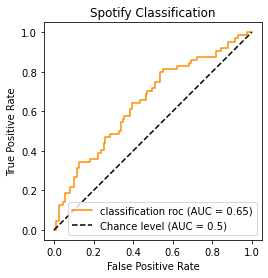

In [118]:
# plot ROC curve 
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(
    y_test,
    y_score[:,0], 
    name=f"classification roc",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Spotify Classification")
plt.legend()
plt.show()

In [119]:
# print different metrics
# accuracy
# F-1 
# AUC 